*`Will do 3 projects using ANN: Binary Classification, Multiclass Classification, Regression`*

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- *`Types of Neural Networks -> `5 main types are:*

1. `Multi Layer Perceptron` ==> Simple type of ANN
    - MLP can be used in Classification and Regression types of Problems
    - If you want to capture non-linear relationships
    Add more hiddent layers and you will capture more hidden relationship
2. `CNN` ==> mostly used in Image and Video processing
    - type of ANN having atleast one layer of Convolution in it
    input layer --> Convulation layer --> pooling layer --> fully connected layer --> output layer [pooling can't be ignored]
    Above two NN are FeedForword type, but in RNN results FeedBackword inside Hidden layers
3. `RNN` ==> mostly used in NLP
    - LSTM** ==> Good variation of RNN
4. `Auto Encoders` ==> used in cases where one dont want to lose quality
    - Compress an image/file/video without loosing quality of that image
    - input layers and output layers will have equal number of nodes but hidden layers will have less nodes
5. `GAN` ==> ANN can imagin
    - Lan goodfellow
    - All about Generator[generate somthing] and Discriminator[discriminate if generated somthing is fake or real]
        - AIM: Generator have to fool discriminator

*Regession Problem*

In [13]:
file = 'Housing_Price_Data.csv'
df = pd.read_csv(file)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


- *`Perceptron` is an algorith/mathematical model/mathematical function like Linear Regression or Logistic Regression*
    1. It is a binary classifier
    2. Used for ==> Supervised Machine Learning
    3. Because of it's design it becomes building block of deep learning
    4. Perceptron training(learning) means telling weights and biases to Perceptron
*weights ==> tells feature importance*

In [14]:
df.shape

(545, 13)

In [15]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
cat_cols = df.select_dtypes(include='object').columns.to_list()
num_cols = df.select_dtypes(exclude='object').columns.to_list()

cat_cols, num_cols

(['mainroad',
  'guestroom',
  'basement',
  'hotwaterheating',
  'airconditioning',
  'prefarea',
  'furnishingstatus'],
 ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'])

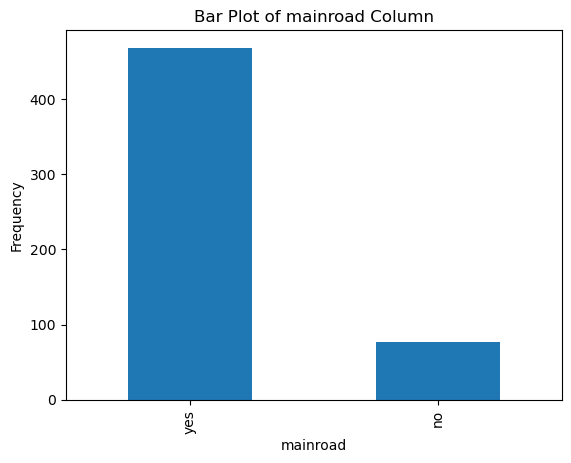

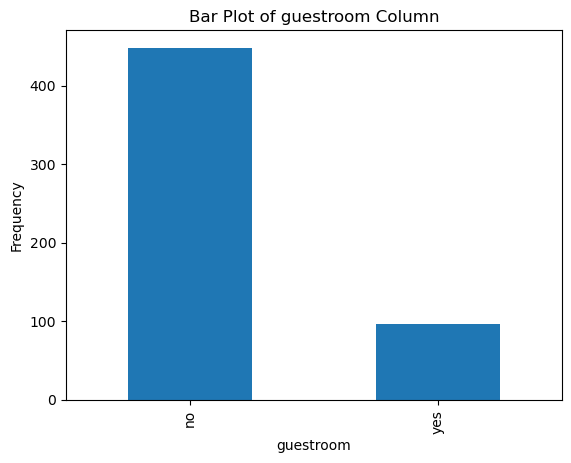

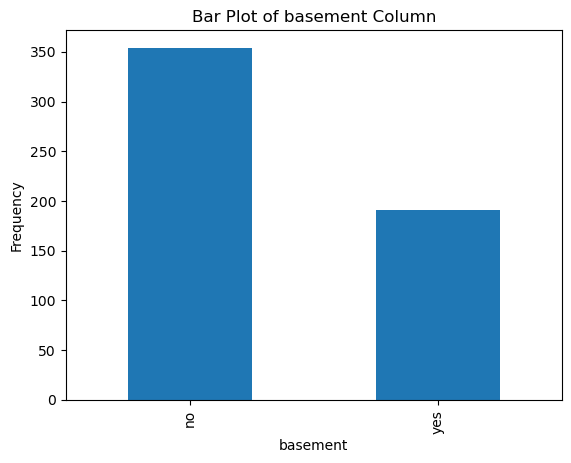

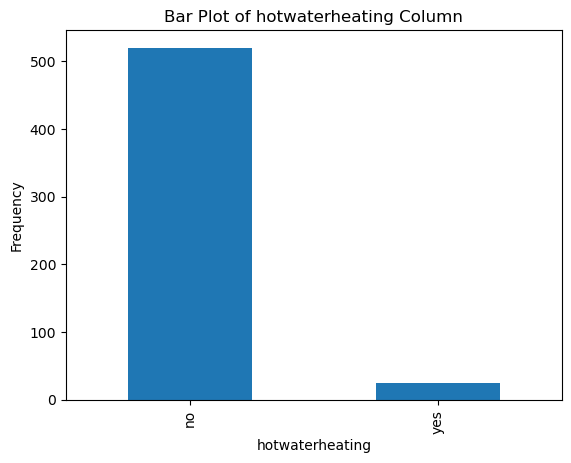

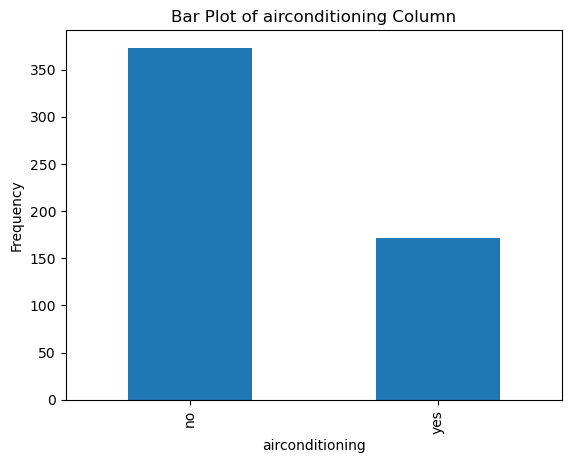

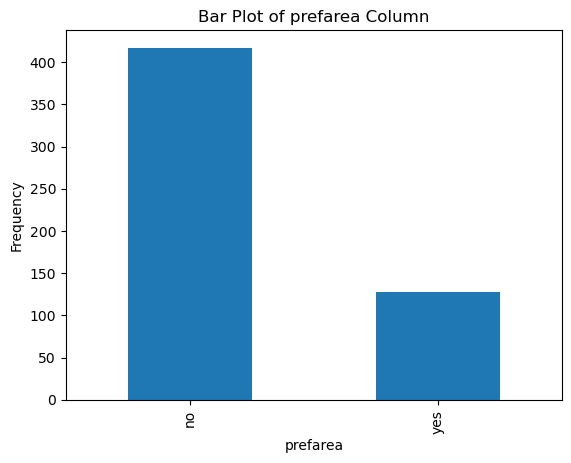

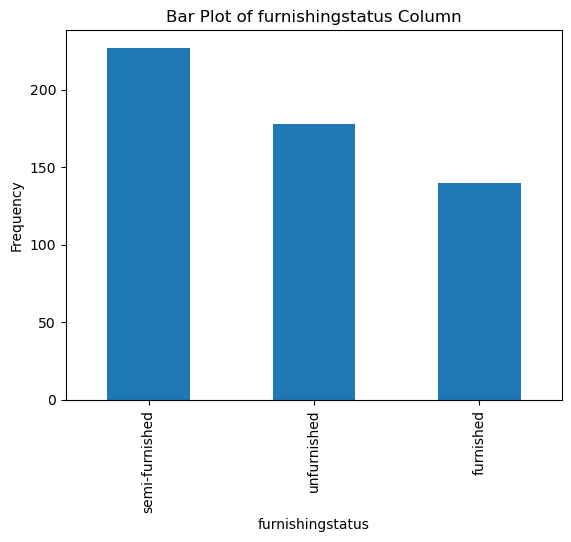

In [19]:
for col in cat_cols:
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Bar Plot of {col} Column")
    plt.xlabel(f"{col}")
    plt.ylabel("Frequency")
    plt.show()

In [20]:
# Categorical Encoding -> cat_cols : columns to encod
for col in cat_cols:
    if df[col].nunique() == 2: # Label Encoding
        df[col] = df[col].map({"yes":1, "no":0})
    else: # One Hot Encoding
        df = pd.get_dummies(df, columns=[col], drop_first=True)

df.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
198,4935000,5948,3,1,2,1,0,0,0,1,0,0,True,False
302,4200000,2145,3,1,3,1,0,0,0,0,1,1,False,True
428,3325000,4040,2,1,1,1,0,0,0,0,1,0,False,True
247,4550000,8400,4,1,4,1,0,0,0,0,3,0,False,True
476,2940000,5850,3,1,2,1,0,1,0,0,1,0,False,True
361,3710000,6020,3,1,1,1,0,0,0,0,0,0,True,False
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,True,False
12,9310000,6550,4,2,2,1,0,0,0,1,1,1,True,False
501,2660000,2430,3,1,1,0,0,0,0,0,0,0,False,True
224,4760000,10240,2,1,1,1,0,0,0,1,2,1,False,True


*Split Dataset into Features and Target*

In [28]:
X = df.drop(columns=['price']).values
y = df["price"].values

*Scale Values of X, y using Standard Scaler*

In [30]:
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
scaler_y = StandardScaler()

X = scaler_x.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1))

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((436, 13), (109, 13), (436, 1), (109, 1))

- *`Build an ANN Model using Tensorflow and Keras:`*
    - 1 input layer
    - 1 hidden layer ==> will put 3 nodes/perceptron in hidden layer
    - 1 output layer

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [41]:
# Regression Problem
model = Sequential([
        Dense(units=3, activation='relu', input_dim=13), # Hidden Layer
        Dense(units=1, activation='linear') # Output Layer
        ])

In [42]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 3)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46 (184.00 B)

 Trainable params: 46 (184.00 B)

 Non-trainable params: 0 (0.00 B)

- *`model compilation stage`* 
    - Decide which loss function to use
    - Decide which optimizer to use for Gradean Descent`*

In [44]:
opt = keras.optimizers.Adam(learning_rate=0.01)
opt

In [45]:
model.compile(loss='mse', optimizer=opt, metrics=['mae'])

In [46]:
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1679 - mae: 0.8665
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7178 - mae: 0.6280
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5165 - mae: 0.5273
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4524 - mae: 0.4920 
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4050 - mae: 0.4631 
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3717 - mae: 0.4449 
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3454 - mae: 0.4316 
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3268 - mae: 0.4207 
Epoch 9/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3173 - mae: 0.4111  
Epoch 10/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3142 - mae: 0.4089 


In [47]:
history.history

{'loss': [1.1679474115371704,
  0.7177731394767761,
  0.516498327255249,
  0.45242664217948914,
  0.4049777388572693,
  0.37168678641319275,
  0.34544822573661804,
  0.3268181085586548,
  0.31725558638572693,
  0.3142412304878235],
 'mae': [0.8665391206741333,
  0.6279603242874146,
  0.5273230075836182,
  0.4919731914997101,
  0.4631226360797882,
  0.4448651671409607,
  0.43156978487968445,
  0.4207259714603424,
  0.41112571954727173,
  0.40892675518989563]}

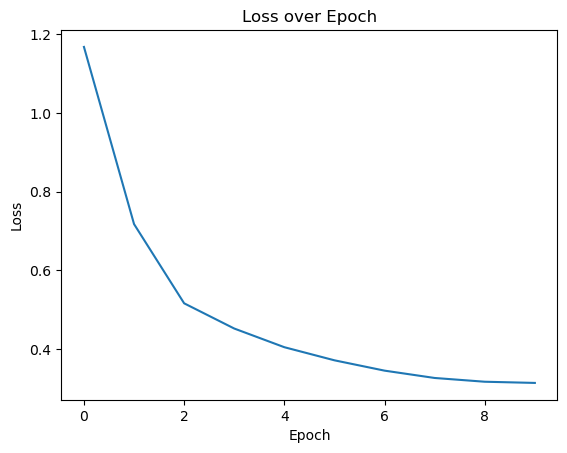

In [49]:
plt.plot(history.history['loss'])
plt.title('Loss over Epoch')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

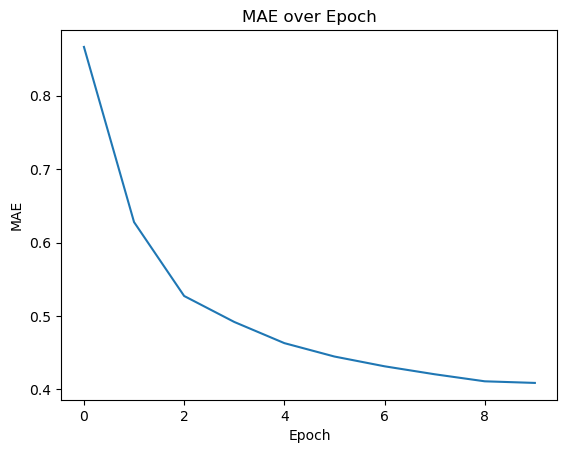

In [50]:
plt.plot(history.history['mae'])
plt.title('MAE over Epoch')
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.show()

*`Here we have all Weights and Biases of our model`*

In [ ]:
# Weights and Biases between Input Layer and Hidden Layer
model.layers[0].get_weights()

[array([[ 5.11864841e-01, -7.51712501e-01,  3.40817153e-01],
        [ 5.92164360e-02, -5.47255576e-02,  1.81417212e-01],
        [-2.66792066e-02, -8.67555976e-01,  5.30038893e-01],
        [ 6.40250981e-01, -5.84105074e-01,  5.13670668e-02],
        [ 6.59937143e-01, -2.06359923e-01,  9.70680453e-03],
        [-2.64606029e-01, -6.71224535e-01,  2.23219216e-01],
        [ 4.11632627e-01, -2.35911503e-01, -4.24374379e-02],
        [ 1.02899671e-01, -1.11696266e-01,  1.77846745e-01],
        [ 2.62163699e-01, -1.14466392e-01,  4.71832991e-01],
        [ 4.14205432e-01, -1.23039878e-04,  1.36188045e-01],
        [ 3.33335489e-01,  4.75581922e-02,  2.24683657e-01],
        [ 2.30219379e-01, -3.76448900e-01, -2.06638709e-01],
        [-1.70957014e-01,  1.84302986e-01, -1.27915919e-01]], dtype=float32),
 array([ 0.1367299 ,  0.45899698, -0.22070575], dtype=float32)]

In [ ]:
# Weights and Biases between Hidden Layer and Output Layer
model.layers[1].get_weights()

[array([[ 0.28025457],
        [-0.22712065],
        [ 0.57115686]], dtype=float32),
 array([-0.20226419], dtype=float32)]

In [53]:
# Predictions
y_pred = model.predict(X_test)
y_pred

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[-0.91982687],
       [ 0.9208342 ],
       [-0.8981419 ],
       [-0.20226419],
       [-0.6706921 ],
       [ 2.4138565 ],
       [ 1.0859127 ],
       [-0.6513828 ],
       [ 0.974404  ],
       [ 0.18277776],
       [-0.8664996 ],
       [-0.10120834],
       [ 0.2055198 ],
       [-0.92140174],
       [ 0.07364187],
       [-1.1000569 ],
       [ 0.5387278 ],
       [ 0.8307272 ],
       [-0.1287356 ],
       [-0.2101712 ],
       [-0.78366977],
       [-0.8114095 ],
       [ 1.4924971 ],
       [-0.01631692],
       [-0.7108579 ],
       [-0.2679601 ],
       [-0.22131014],
       [-0.8459724 ],
       [-0.7352623 ],
       [ 0.169545  ],
       [-0.5018394 ],
       [-0.9544744 ],
       [-0.6031337 ],
       [-0.72497636],
       [ 0.32950854],
       [ 0.9582555 ],
       [-0.20226419],
       [ 2.0273452 ],
       [ 0.6617241 ],
       [-0.6326312 ],
       [-0.10525677],
       [ 0.7362071 ],
       [-0.03007969],
       [-0.6390253 ],
       [-1.1312349 ],
       [ 1

In [55]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

0.4125360910358489

- *`How to change ANN Architecture for more accuracy improvement`*
    - Hidden layer activation fucntion to anthor.
    - Increase Number of Epochs.
    - Increase number of nodes in Hidden layer say 8 or 10.
    - Increase number of Hidden Layers ==> can lead to overfitting.

In [56]:
model = Sequential()
# Hidden Layers
model.add(Dense(units=10, activation='relu', input_dim=13))
model.add(Dense(units=15, activation='relu'))
# Output Layer
model.add(Dense(units=1, activation='linear'))

model.summary()

c:\Users\mr\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 15)             │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
opt = keras.optimizers.Adam(learning_rate=0.1)

In [71]:
model.compile(loss='mse', optimizer=opt, metrics=['mae', 'mse'])

hist = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 0.1737 - mae: 0.3294 - mse: 0.1737

c:\Users\mr\anaconda3\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 0.2591 - mae: 0.3622 - mse: 0.2591 - val_loss: 0.2638 - val_mae: 0.3688 - val_mse: 0.2638
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.2513 - mae: 0.3618 - mse: 0.2513 - val_loss: 0.2335 - val_mae: 0.3328 - val_mse: 0.2335
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.2805 - mae: 0.3683 - mse: 0.2805 - val_loss: 0.3319 - val_mae: 0.3872 - val_mse: 0.3319
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.2597 - mae: 0.3667 - mse: 0.2597 - val_loss: 0.2383 - val_mae: 0.3307 - val_mse: 0.2383
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.2632 - mae: 0.3758 - mse: 0.2632 - val_loss: 0.2930 - val_mae: 0.4240 - val_mse: 0.2930
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.2522 - mae: 0.3635 - mse: 0.2522 - val_loss: 0.2684 - val_mae: 0.3660 - val_mse: 0.2684
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.2223 - mae: 0.3366 - mse: 0.2223 - val_loss: 0.23

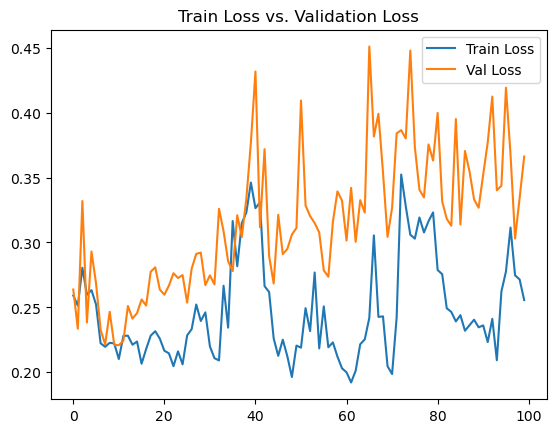

In [73]:
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Val Loss')
plt.title("Train Loss vs. Validation Loss")
plt.legend()
plt.show()

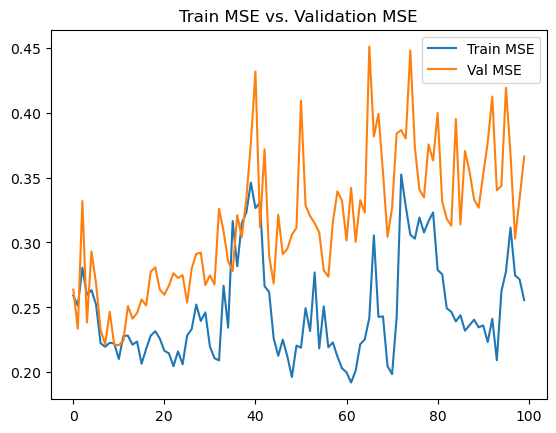

In [74]:
plt.plot(hist.history['mse'], label='Train MSE')
plt.plot(hist.history['val_mse'], label='Val MSE')
plt.title("Train MSE vs. Validation MSE")
plt.legend()
plt.show()

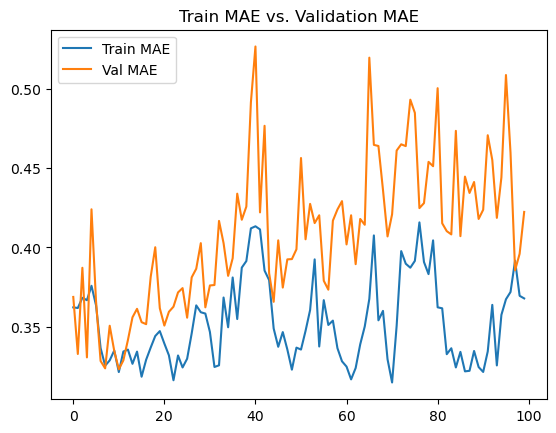

In [75]:
plt.plot(hist.history['mae'], label='Train MAE')
plt.plot(hist.history['val_mae'], label='Val MAE')
plt.title("Train MAE vs. Validation MAE")
plt.legend()
plt.show()

- *`Overfitting`*
    - Regularization
    - Dropout can be used

In [84]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

round(r2_score(y_test, y_pred) * 100, 2)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step

c:\Users\mr\anaconda3\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


55.99